In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import matplotlib.cm as cm
import matplotlib as mpl

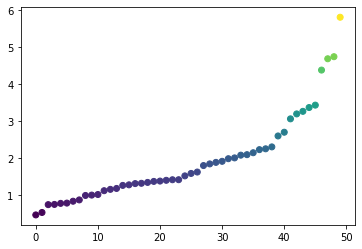

In [2]:
N = 50
x = np.arange(N)
y = np.random.normal(0.25,0.4,N)+np.random.weibull(1,N)+np.random.normal(0.6,0.1,N)+0.05
y = np.sort(y)
plt.scatter(x,y,c=y) 

# Definiowanie kolorów

* defnioowanie kolorów jako sygnatura HTML, 
* jako 3-kortka lub 4-krotka (z alpha lub bez) 
* jako nazwany kolor z listy kolorów

https://matplotlib.org/stable/gallery/color/named_colors.html

Lista kolorów to słowniki, nazwa:wartość



In [28]:
c1 = '#FFAA11' # HTML bez kanału alpha
c2 = '#FFAA1166' # HTML z kanałem alpha
c3 = (1,0.8,0.1) # krotka
c4 = (255,11,128) # krotka w wartościach od 0 do 255
print(clt.BASE_COLORS) # tabele kolorów ładowane domyślnie
print(clt.TABLEAU_COLORS)
clt.CSS4_COLORS




{'b': (0, 0, 1), 'g': (0, 0.5, 0), 'r': (1, 0, 0), 'c': (0, 0.75, 0.75), 'm': (0.75, 0, 0.75), 'y': (0.75, 0.75, 0), 'k': (0, 0, 0), 'w': (1, 1, 1)}
{'tab:blue': '#1f77b4', 'tab:orange': '#ff7f0e', 'tab:green': '#2ca02c', 'tab:red': '#d62728', 'tab:purple': '#9467bd', 'tab:brown': '#8c564b', 'tab:pink': '#e377c2', 'tab:gray': '#7f7f7f', 'tab:olive': '#bcbd22', 'tab:cyan': '#17becf'}


{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

# Wyświetlanie kolorów z listy

Dla dowolnego wykresu można użyć listy kolorów jako parametru, zdefinowanych w powyższy sposób/ Lista kolorów musi być takiej samej długości jak x i y

To ograniczenie dłogości nie obowiązuje jeżeli stosujemy mapę kolorów

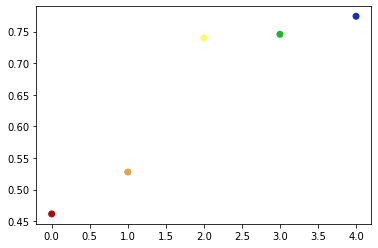

In [4]:
colors = ["#ae0707","#dfa647","#fff965","#1db630","#1d2cb6"]
plt.scatter(x[:5],y[:5],c=colors) 

# Mapy kolorów

Dlaczego mapa (rzutowanie) kolorów. Bo rzutujemy wartości z przedziału v = [0,1] na wartości R,G, i B. Mapa kolorów do funkcja, która rzutuje dowloną wartość z v na dowolną triadę RGB(A).

* wbudowane mapy kolorów

https://matplotlib.org/stable/gallery/color/colormap_reference.html

* mapy dyskretne (Listed)
* mapy ciągłe (LinearSegmented)

Mapy ciągłe mogą być zbieżne, cykliczne (pierwszy i ostatni kolor taki sam), linowe i dowolne

Możemy tworzyć własne mapy kolorów, zarówno ciągłe jak i dyskretne. Tworzenie map ciągłych poprzez domyślne wywołanie funkcji jest skomplikowane skomplikowane, stosuje się pomocniczą metodę `.from list`. Metoda posiada wiele ograniczeń w stosunku do właściwej metody tworzenia palet.

Mapa ciągła kolorów interpoluje liniowo wartości pomiędzy zdefiniowanymi punktami stopu.

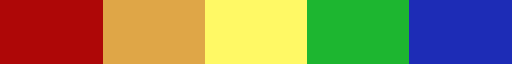

In [33]:
listed = clt.ListedColormap(colors,name='listed')
segmented = clt.LinearSegmentedColormap.from_list('segmented',colors) # obie metody mają niekompatybilną składnię
listed
#listed.resampled(10) #nie działa w starszych wersjach
#listed.reversed()

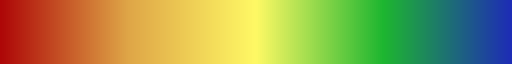

In [6]:
segmented

## Budowanie LSCM na podstawie słownika przebiegu kolorów

Każdy element listy definiuje:

[położenie (stop) X, lewa wartość składowej koloru Y, prawa wartość Y]

Pozwala to na tworzenie nieciągłości, wartości są w przedziale od 0 do 1:

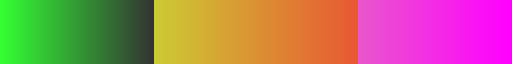

In [7]:
cdict = {'red': [[0,0,0.2],
              [0.3,0.2,0.8],
              [1,1,1]],
         'green': [[0,1,1],
              [0.3,0.2,0.8],
              [1,0,0]],
         'blue': [[0,.5,0.2],
              [0.7,0.2,0.8],
              [1,1,1]]
        }
discont = clt.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
discont

Text(0.5, 1.0, 'segmented (discontinuous)')

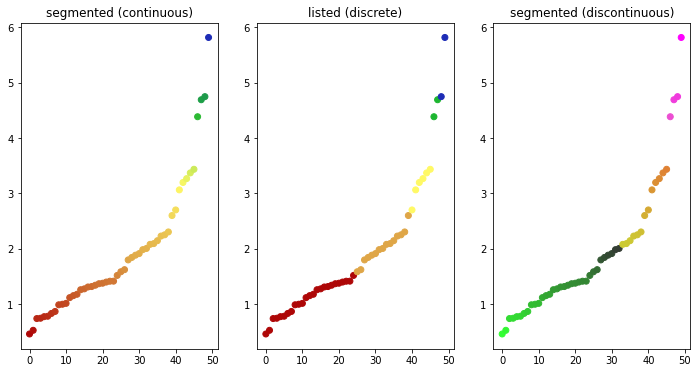

In [34]:
fig,ax = plt.subplots(ncols = 3,figsize=(12,6))
ax[0].scatter(x,y,c=y,cmap=segmented)
ax[1].scatter(x,y,c=y,cmap=listed)
ax[2].scatter(x,y,c=y,cmap=discont)
ax[0].set_title("segmented (continuous)")
ax[1].set_title("listed (discrete)")
ax[2].set_title("segmented (discontinuous)")

# Normalizacja map kolorów

Norma czyli funkcja mapująca z jednej przestrzeni R do drugiej, nieujemnej

Normalizacja oznacza przypisanie określonych wartości danych do określonych wartości na skali kolorów. W przypadku normy domyślnej jest to przeskalowanie wartości zakresu danych do przedziału [0,1]. Następnie wartości są rzutowane na określone kolory. Pozostałe normy przekształcają rzutowanie wybraną funkcją.

UWAGA: W przypadku własnej funkcji należy pdoać funkcję prostą (_forward_) i odwortoną (_reverse_)

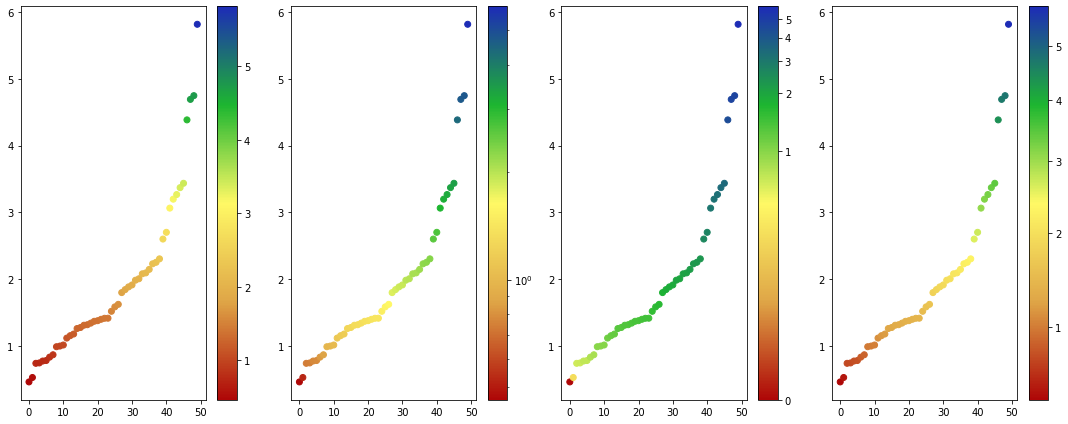

In [9]:
fig,ax = plt.subplots(ncols = 4,figsize=(15,6))
ax0 = ax[0].scatter(x,y,c=y,cmap=segmented)
fig.colorbar(ax0, ax=ax[0])
ax1 = ax[1].scatter(x,y,c=y,cmap=segmented,norm=clt.LogNorm())
fig.colorbar(ax1, ax=ax[1])
ax2 = ax[2].scatter(x,y,c=y,cmap=segmented,norm=clt.PowerNorm(0.2))
fig.colorbar(ax2, ax=ax[2])
ax3 = ax[3].scatter(x,y,c=y,cmap=segmented,norm=clt.FuncNorm((lambda x: x**(1/2), lambda x: x**2)))
fig.colorbar(ax3, ax=ax[3])
plt.tight_layout()


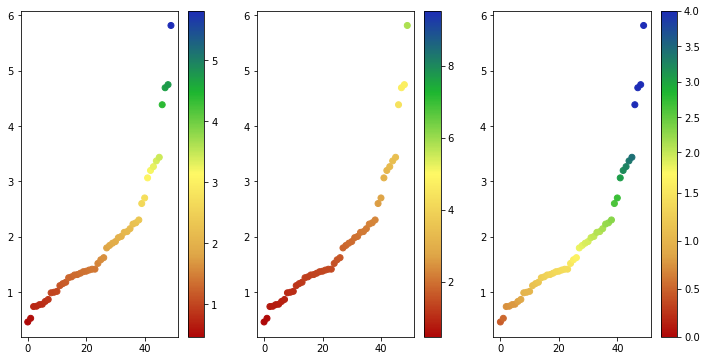

In [36]:
fig,ax = plt.subplots(ncols=3,figsize=(12,6))
ax0 = ax[0].scatter(x,y,c=y,cmap=segmented)
fig.colorbar(ax0, ax=ax[0])
ax1 = ax[1].scatter(x,y,c=y,cmap=segmented,norm=clt.CenteredNorm(vcenter=5))
fig.colorbar(ax1, ax=ax[1])
ax2 = ax[2].scatter(x,y,c=y,cmap=segmented,norm=clt.TwoSlopeNorm(vcenter=1.7,vmin=0,vmax=4))
fig.colorbar(ax2, ax=ax[2])

# Norma dyskretna

przypisuje wartości do określonych punktów na palecie. Wszystkie wartości aż do napotkania nowej granicy otrzymują ten sam kolor. Brak normy i paleta dyskretna powoduje dyskretyzację palety w wyniku podziału zakresu danych na ilość kolorów przypisanych do danej palety

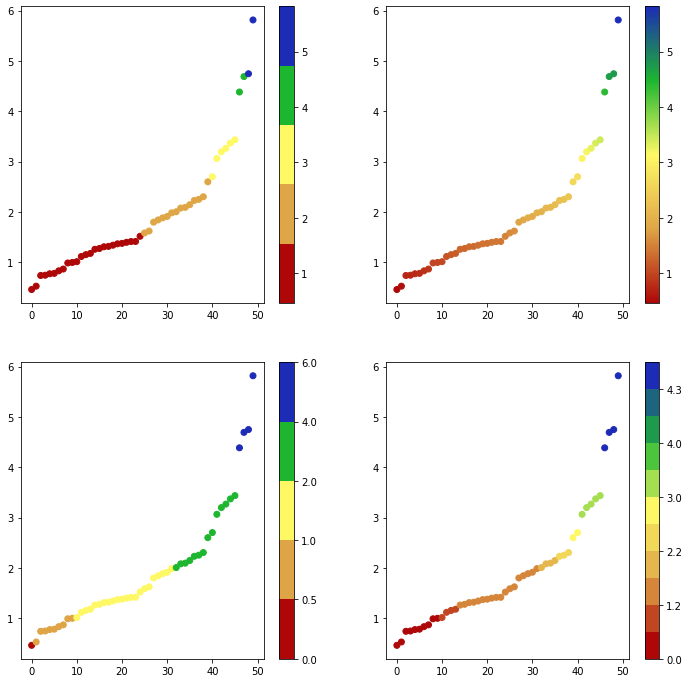

In [37]:
fig,ax = plt.subplots(nrows = 2,ncols=2,figsize=(12,12))
ax0 = ax[0][0].scatter(x,y,c=y,cmap=listed)
ax1 = ax[0][1].scatter(x,y,c=y,cmap=segmented)
ax2 = ax[1][0].scatter(x,y,c=y,cmap=segmented,norm=clt.BoundaryNorm([0,0.5,1,2,4,6], ncolors=256, clip=True))
ax3 = ax[1][1].scatter(x,y,c=y,cmap=segmented,norm=clt.BoundaryNorm([0,1,1.2,2,2.2,2.5,3,3.5,4,4.1,4.3,6], ncolors=256, clip=True))
fig.colorbar(ax0, ax=ax[0][0])
fig.colorbar(ax1, ax=ax[0][1])
fig.colorbar(ax2, ax=ax[1][0])
fig.colorbar(ax3, ax=ax[1][1])

# Generowanie palet dyskretynych na podstawie istniejących palet

([<matplotlib.patches.Wedge at 0x7f82cd406850>,
 [Text(0.99969940254491, 0.4589129596681166, ''),
  Text(0.21169675124344134, 1.079437115126663, ''),
  Text(-1.0185172463872227, 0.41547878262528565, ''),
  Text(0.2579404640679794, -1.0693300318406826, '')])

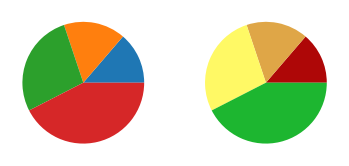

In [12]:
pies = [10,12,20,31]
fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.pie(pies)
ax2.pie(pies,colors=colors)

([<matplotlib.patches.Wedge at 0x7f82cd7cd250>,
 [Text(0.99969940254491, 0.4589129596681166, ''),
  Text(0.21169675124344134, 1.079437115126663, ''),
  Text(-1.0185172463872227, 0.41547878262528565, ''),
  Text(0.2579404640679794, -1.0693300318406826, '')])

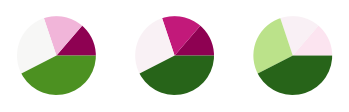

In [13]:
norm = clt.Normalize(10,31)
cnorm = clt.CenteredNorm(vcenter=13)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
ax1.pie(pies,colors=cm.PiYG((0,0.3,0.5,0.9)))
ax2.pie(pies,colors=cm.PiYG(norm(pies)))
ax3.pie(pies,colors=cm.PiYG(cnorm(pies)))

# Własne normy

Matplotlib nie dysponuje narzędziami do tworzenia własnych norm dla palet ciągłych definiowanych poprzez listę wartości, albo metody wyrównania histogramu. Można na szczęście napisać sobie własne narzędzie do tworzenia norm. Jest to klasa zawierająca metodę `__call__`, czyli wywołanie instancji jako funkcji, które wykonuje tworzenie normy oraz metodę `inverse`, która tworzy normę odwrotną, tak jak w przypadku tworzenia normy poprzez funkcję.

In [14]:
class customNorm(clt.Normalize):
    def __init__(self,stops,vmin=-np.inf,vmax=np.inf,clip=False):
        super().__init__(vmin, vmax, clip)
        self.stops = np.asarray(stops)
        self.mapable = np.linspace(0,1,len(self.stops))
        self.vmin=vmin
        self.vmax=vmax

    def __call__(self,value,clip=None):
        return np.ma.masked_array(np.interp(value,self.stops,self.mapable,
                         left=self.vmin, right=self.vmax))

    def inverse(self,value):
        return np.interp(value,self.mapable,self.stops,
                         left=self.vmin, right=self.vmax)

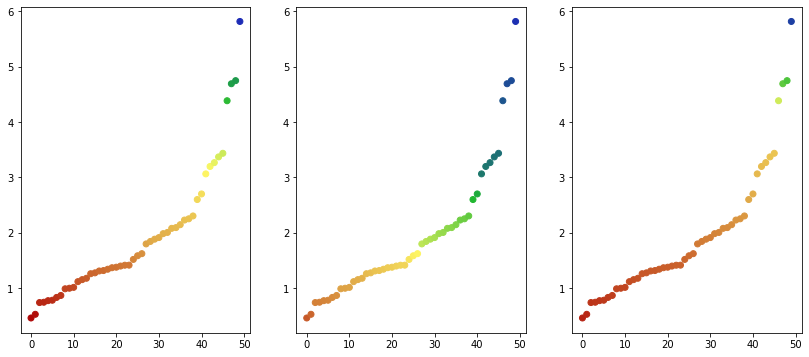

In [15]:
fig,ax = plt.subplots(ncols=3,figsize=(14,6))
ax[0].scatter(x,y,c=y,cmap=segmented)
ax[1].scatter(x,y,c=y,cmap=segmented,norm=customNorm([0,0.5,1.2,1.5,1.8,2.5,3,6]))
ax[2].scatter(x,y,c=y,cmap=segmented,norm=customNorm([0,2,4,4.5,5,6]))

W analizie danych są dwie normy specjalne (nieobencne w matplotlib), które służą do dopasowania skali kolorów do danych. Są to wyrównanie histogramem i wyrównanie kwantylowe. Dla rozkładów jednomodlanych są one do siebie zbliżone, dla polimodalnych norma wyrównania dostosowuje się do lokalnych gęstości histogramu.

In [16]:
def histogramEq(y,nbins=256):
    histogram = np.histogram(y,nbins)[0]
    cdf = np.cumsum(histogram)
    eq = ((cdf-cdf.min())/(cdf.max()-cdf.min()))*(nbins-1)
    hst = np.linspace(y.min(),y.max(),nbins)
    f = np.interp(np.arange(nbins),eq,hst)
    return f

def normalize(v): # clt.Normalize(vmin,vmax)(values)
    v = np.asarray(v)
    return (v-v.min())/(v.max()-v.min())

In [41]:
q = np.quantile(y,q=np.linspace(0,1,9)) # to samo co percentile
h = histogramEq(y,9)
quantile_norm = customNorm(q,0,1)
histogram_norm=customNorm(h,0,1)

In [40]:
y

array([0.46140259, 0.5276752 , 0.73991735, 0.74561558, 0.77418253,
       0.78185762, 0.83224161, 0.8680475 , 0.98853162, 0.99844102,
       1.01416578, 1.11770805, 1.15388964, 1.17842187, 1.26073172,
       1.27635822, 1.31017467, 1.3178976 , 1.34178111, 1.36904735,
       1.37818108, 1.39899776, 1.41416959, 1.41527385, 1.51873875,
       1.58501802, 1.62290675, 1.79882617, 1.84348322, 1.88438414,
       1.91336106, 1.98425134, 2.00600076, 2.07998214, 2.09367304,
       2.14603514, 2.22977964, 2.25231602, 2.30395495, 2.60034831,
       2.70123331, 3.06370706, 3.19741464, 3.26695341, 3.37019972,
       3.43541483, 4.38468814, 4.69156645, 4.74749676, 5.81605097])

In [43]:
q

array([0.46140259, 0.83671735, 1.16002269, 1.35200595, 1.55187838,
       1.95766748, 2.24668193, 3.25826106, 5.81605097])

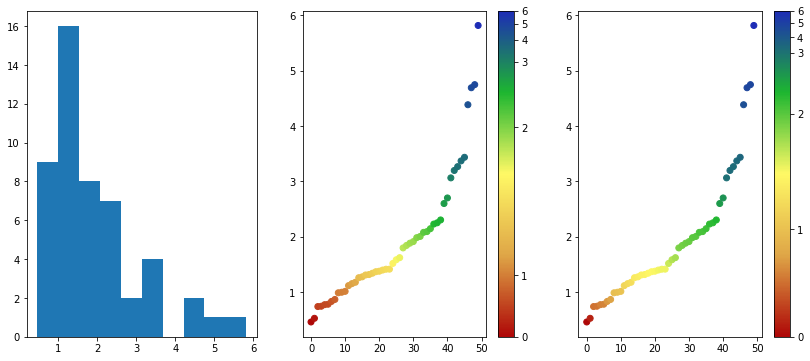

In [45]:
fig,ax = plt.subplots(ncols=3,figsize=(14,6))

ax[0].hist(y)
ax1 = ax[1].scatter(x,y,c=y,cmap=segmented,norm=quantile_norm)
ax2 = ax[2].scatter(x,y,c=y,cmap=segmented,norm=histogram_norm)
fig.colorbar(ax1, ax=ax[1])
fig.colorbar(ax2, ax=ax[2])

# Normy wbuudowane w paletę

Paleta jest tworzona na zasadzie liniowej interpolacji pomiędzy równomiernie rozłożonymi kolorami (wersja `.from_list`). Można utworzyć paletę wskazując położenie poszczególnych kolorów. Położenie kolorów musi być normalizowane do przedziału [0,1].

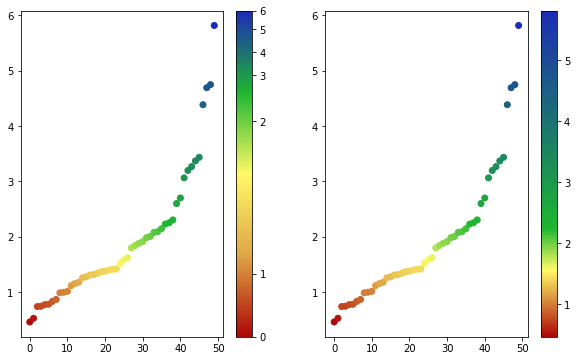

In [19]:
q = np.quantile(y,q=np.linspace(0,1,5)) # liczba kwantyli musi być równa licznie kolorów
quantile_norm = customNorm(q,0,1)
# budowanie palety
qn = normalize(q)
segmented_q = clt.LinearSegmentedColormap.from_list('segmented_q',colors=list(zip(qn,colors)))

fig,ax = plt.subplots(ncols=2,figsize=(10,6))
ax0 = ax[0].scatter(x,y,c=y,cmap=segmented,norm = quantile_norm)
ax1 = ax[1].scatter(x,y,c=y,cmap=segmented_q)
fig.colorbar(ax0, ax=ax[0])
fig.colorbar(ax1, ax=ax[1])

# Formatowanie paska colorów

Rozmiar i położenie paska kolorów można definiować przy pomocy wskazania wykresu do którego ma być doklejony (`ax`) lub poprzez dodanie wykresu (`add_axes`) do którego colorbar zostanie wprowadzony. 

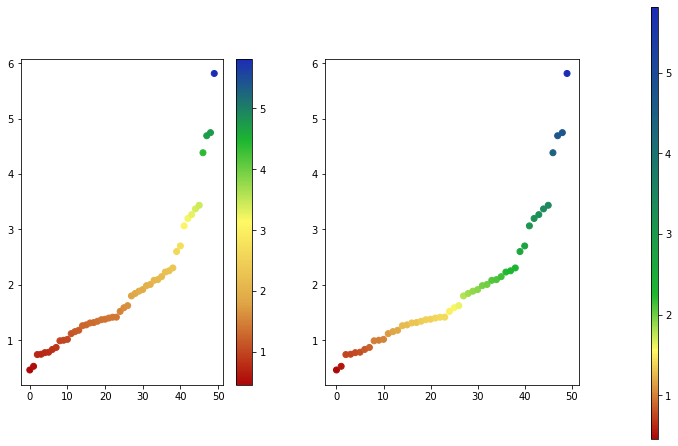

In [48]:
fig,ax = plt.subplots(ncols=2,figsize=(10,6))
ax0 = ax[0].scatter(x,y,c=y,cmap=segmented)
ax1 = ax[1].scatter(x,y,c=y,cmap=segmented_q)
fig.colorbar(ax0,ax=ax[0])
cbar_ax = fig.add_axes((1, 0, 0.01, 1)) #figure (x,y,width,height) figury
fig.colorbar(ax1,cax=cbar_ax)

Jeżeli colorbar dodawany jest jako cześć wykresu, za jego formatowanie odpowiada kilka parametrów.
- **aspect** - długość do szerokości
- **shrink** - długość względem wykresu
- **fraction** - jaka część wykresu
- **extend** - sposób zakończenia
- **ticks** - własne etykiety (przydatny, gdy stosujemy własne normy)

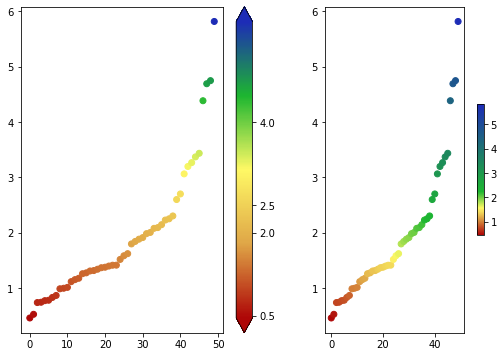

In [50]:
fig,ax = plt.subplots(ncols=2,figsize=(10,6))
ax0 = ax[0].scatter(x,y,c=y,cmap=segmented)
ax1 = ax[1].scatter(x,y,c=y,cmap=segmented_q)
fig.colorbar(ax0,ax=ax[0],extend='both',ticks=[0,0.5,2,2.5,4])
fig.colorbar(ax1,ax=ax[1],aspect=20,shrink=0.4,fraction=0.4)


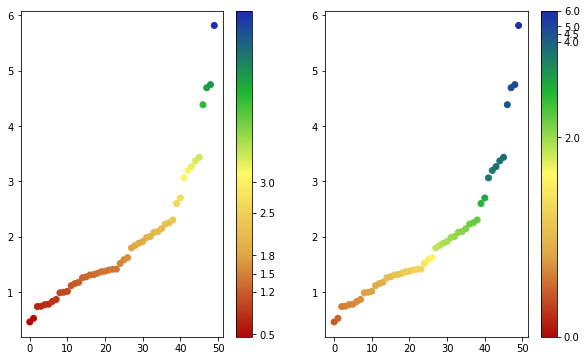

In [54]:
breaks0 = [0,0.5,1.2,1.5,1.8,2.5,3,6]
breaks1 = [0,2,4,4.5,5,6] # nie wyświetli poza zasigiem 0 i 6, bo nie ma w danych.
fig,ax = plt.subplots(ncols=2,figsize=(10,6))
ax0 = ax[0].scatter(x,y,c=y,cmap=segmented)
ax1 = ax[1].scatter(x,y,c=y,cmap=segmented,norm=customNorm(breaks0))
fig.colorbar(ax0,ax=ax[0],ticks=breaks0)
fig.colorbar(ax1,ax=ax[1],ticks=breaks1)


Różne zakresy danych - jedna skala barwna. `Scalar mappable` tworzy obiekt rzutujący wartości na RGB bez definiowania źródła danych

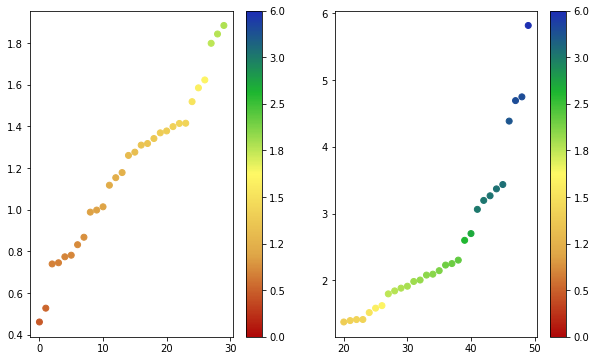

In [60]:
sm = cm.ScalarMappable(cmap=segmented,norm=customNorm(breaks0))
fig,ax = plt.subplots(ncols=2,figsize=(10,6))
ax0 = ax[0].scatter(x[:30],y[:30],c=y[:30],cmap=segmented,norm=customNorm(breaks0))
ax1 = ax[1].scatter(x[20:],y[20:],c=y[20:],cmap=segmented,norm=customNorm(breaks0))
fig.colorbar(sm,ax=ax[0],ticks=breaks0)
fig.colorbar(sm,ax=ax[1],ticks=breaks0)

# Dane 2D i skale barwne

In [24]:
grd = np.meshgrid(np.arange(0,100,1),np.arange(0,100,1))
surf =np.sin(grd[0]**(1/3))+np.cos(grd[1]**(1/2))+np.random.weibull(25,size=(100,100)) # generowanie powierzchni


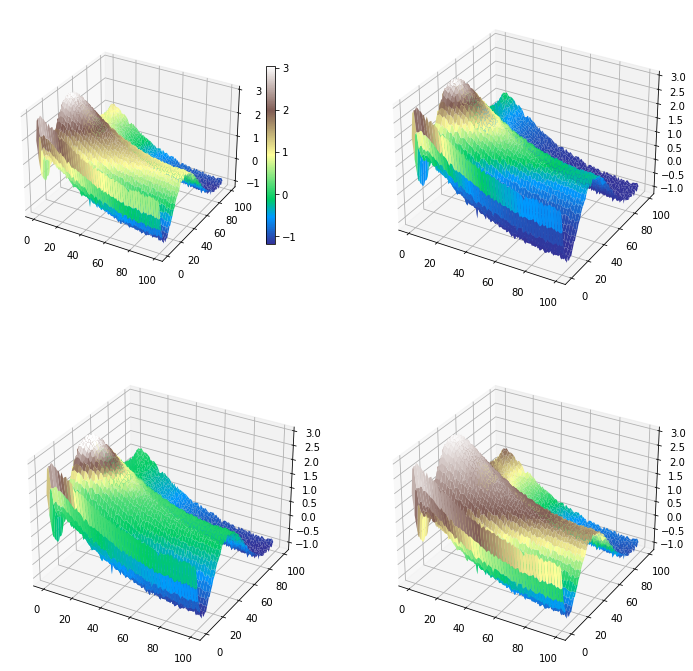

In [25]:

fig, axes = plt.subplots(ncols=2,nrows=2,subplot_kw={"projection": "3d"},figsize=(12,12))
axes[0,0].plot_surface(grd[0],grd[1],surf,cmap='terrain')
axes[0,1].plot_surface(grd[0],grd[1],surf,cmap='terrain',norm=clt.PowerNorm(2.2))
axes[1,0].plot_surface(grd[0],grd[1],surf,cmap='terrain',norm=customNorm([-1,0,1.5,2,2.2,2.5,2.8]))

q = np.quantile(surf,q=np.linspace(0,1,5)) # liczba kwantyli musi być równa licznie kolorów
quantile_norm = customNorm(q,0,1)
axes[1,1].plot_surface(grd[0],grd[1],surf,cmap='terrain',norm=quantile_norm)
fig.colorbar(cm.ScalarMappable(cmap='terrain',norm=clt.Normalize(surf.min(),surf.max())),ax=axes[0,0],shrink=0.6)


# wyświetlanie macierzy 2D

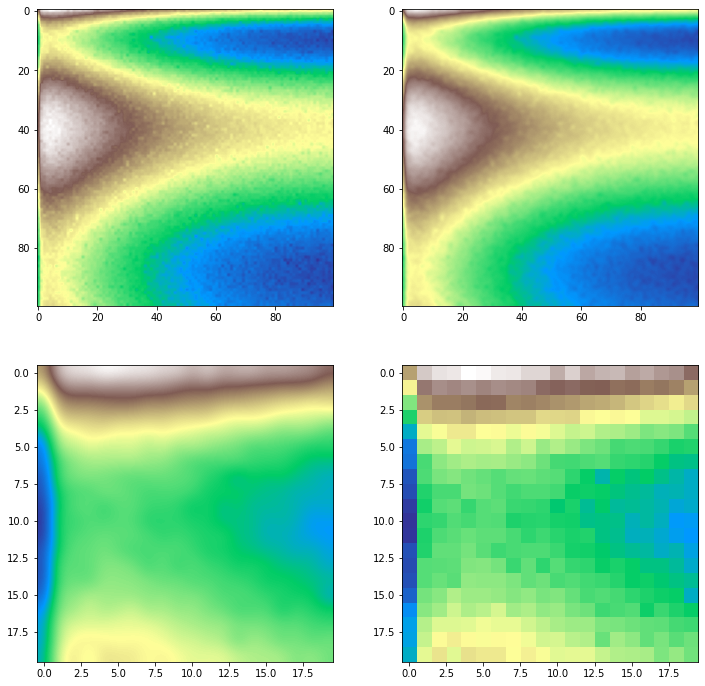

In [62]:
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(12,12))
axes[0,0].imshow(surf,cmap='terrain') #antialiased 
axes[0,1].imshow(surf,cmap='terrain',interpolation='bicubic')
axes[1,0].imshow(surf[0:20,0:20],cmap='terrain',interpolation='bicubic')
axes[1,1].imshow(surf[0:20,0:20],cmap='terrain',interpolation='none')



# Extend, 

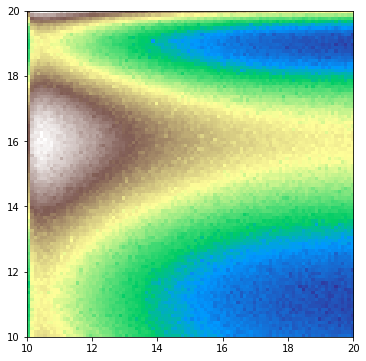

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(surf,cmap='terrain',extent=(10,20,10,20)) 

